In [2]:
import numpy as n
import random
import pandas as pd
import gzip
n = 40428967  #total number of records in the clickstream data 
sample_size = 1000000
skip_values = sorted(random.sample(range(1,n), n-sample_size))
parse_date = lambda val : pd.datetime.strptime(val, '%y%m%d%H')
with gzip.open('C:/Users/harin/Downloads/train.gz') as f:
    train = pd.read_csv(f, parse_dates = ['hour'], date_parser = parse_date, skiprows = skip_values)

C:\Users\harin\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


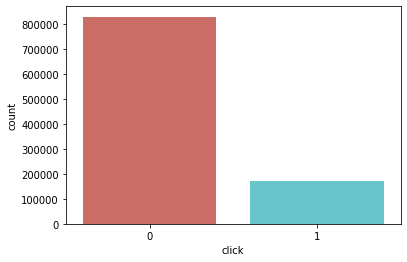

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='click',data=train, palette='hls')
plt.show();

In [4]:
train['click'].value_counts()/len(train)

0    0.829866
1    0.170134
Name: click, dtype: float64

In [5]:
train.hour.describe()

count                 1000000
unique                    240
top       2014-10-22 09:00:00
freq                    11177
first     2014-10-21 00:00:00
last      2014-10-30 23:00:00
Name: hour, dtype: object

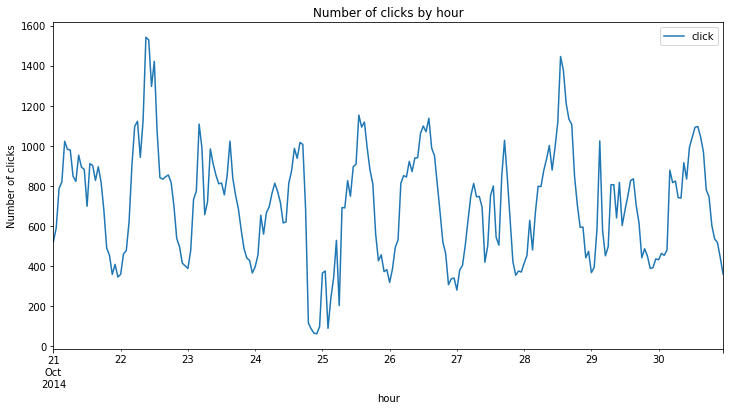

In [6]:
train.groupby('hour').agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour');

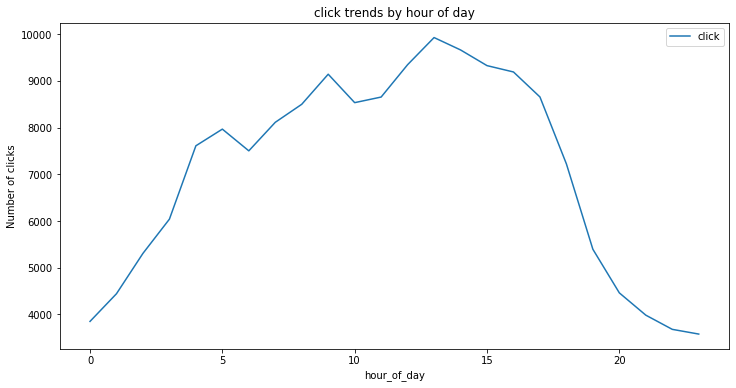

In [7]:
train['hour_of_day'] = train.hour.apply(lambda x: x.hour)
train.groupby('hour_of_day').agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('click trends by hour of day');

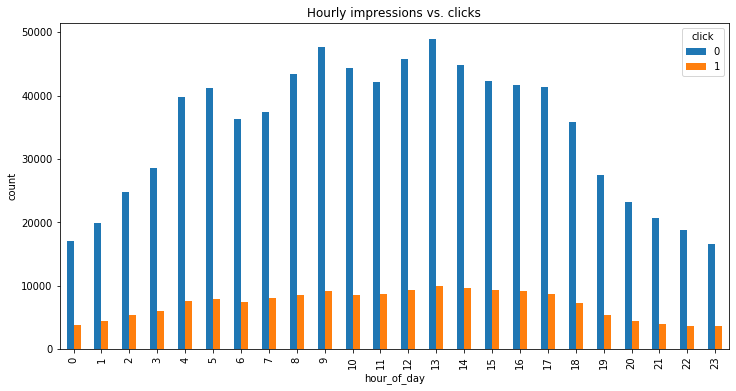

In [8]:
train.groupby(['hour_of_day', 'click']).size().unstack().plot(kind='bar', title="Hour of Day", figsize=(12,6))
plt.ylabel('count')
plt.title('Hourly impressions vs. clicks');

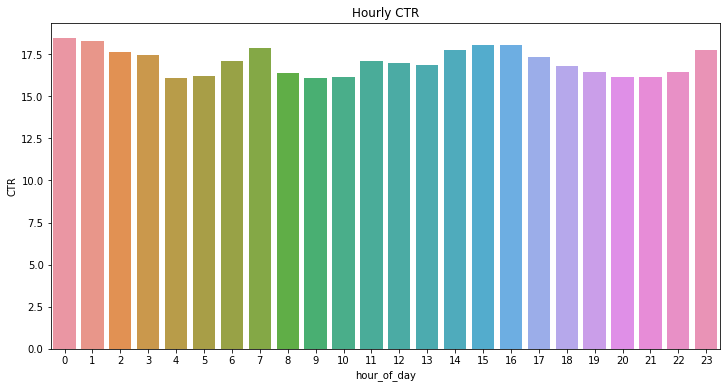

In [9]:
df_click = train[train['click'] == 1]
df_hour = train[['hour_of_day','click']].groupby(['hour_of_day']).count().reset_index()
df_hour = df_hour.rename(columns={'click': 'impressions'})
df_hour['clicks'] = df_click[['hour_of_day','click']].groupby(['hour_of_day']).count().reset_index()['click']
df_hour['CTR'] = df_hour['clicks']/df_hour['impressions']*100
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='hour_of_day', data=df_hour)
plt.title('Hourly CTR');

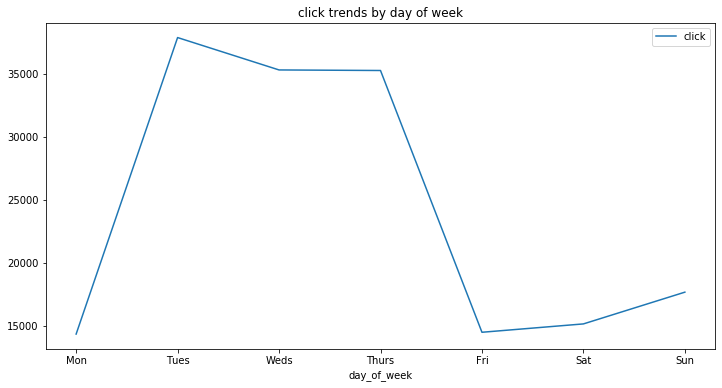

In [14]:
train['day_of_week'] = train['hour'].apply(lambda val: val.day_name())
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
train.groupby('day_of_week').agg({'click':'sum'}).reindex(cats).plot(figsize=(12,6))
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('click trends by day of week');

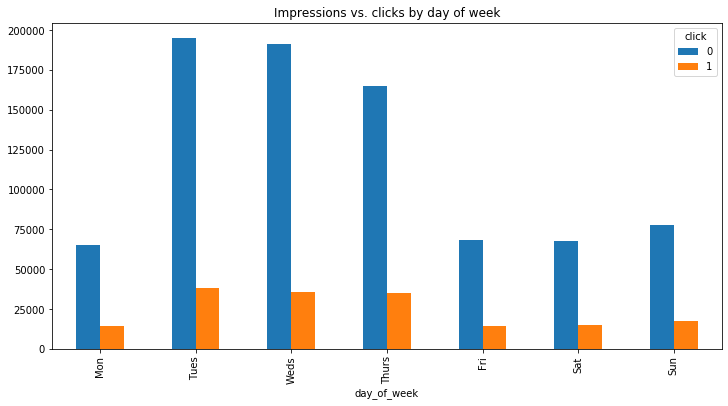

In [15]:
train.groupby(['day_of_week','click']).size().unstack().reindex(cats).plot(kind='bar', title="Day of the Week", figsize=(12,6))
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('Impressions vs. clicks by day of week');

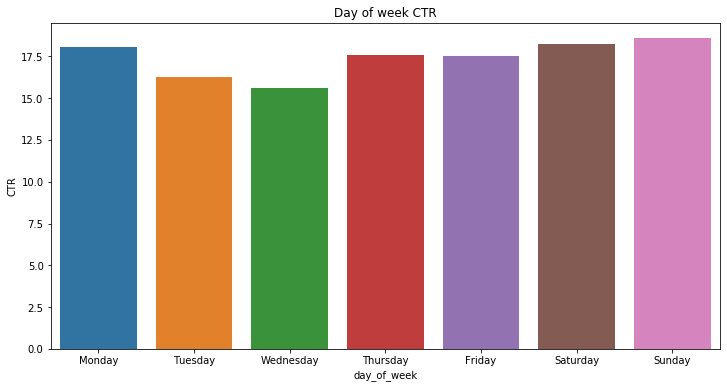

In [16]:
df_click = train[train['click'] == 1]
df_dayofweek = train[['day_of_week','click']].groupby(['day_of_week']).count().reset_index()
df_dayofweek = df_dayofweek.rename(columns={'click': 'impressions'})
df_dayofweek['clicks'] = df_click[['day_of_week','click']].groupby(['day_of_week']).count().reset_index()['click']
df_dayofweek['CTR'] = df_dayofweek['clicks']/df_dayofweek['impressions']*100
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='day_of_week', data=df_dayofweek, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Day of week CTR');

In [17]:
print(train.C1.value_counts()/len(train))

1005    0.918825
1002    0.054783
1010    0.022490
1012    0.002684
1007    0.000849
1001    0.000215
1008    0.000154
Name: C1, dtype: float64


In [20]:
import numpy as np
C1_values = train.C1.unique()
C1_values.sort()
ctr_avg_list=[]
for i in C1_values:
    ctr_avg=train.loc[np.where((train.C1 == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for C1 value: {},  click through rate: {}".format(i,ctr_avg))

for C1 value: 1001,  click through rate: 0.03255813953488372
for C1 value: 1002,  click through rate: 0.21015643539054085
for C1 value: 1005,  click through rate: 0.16981035561722851
for C1 value: 1007,  click through rate: 0.04004711425206125
for C1 value: 1008,  click through rate: 0.09090909090909091
for C1 value: 1010,  click through rate: 0.09328590484659849
for C1 value: 1012,  click through rate: 0.1646795827123696


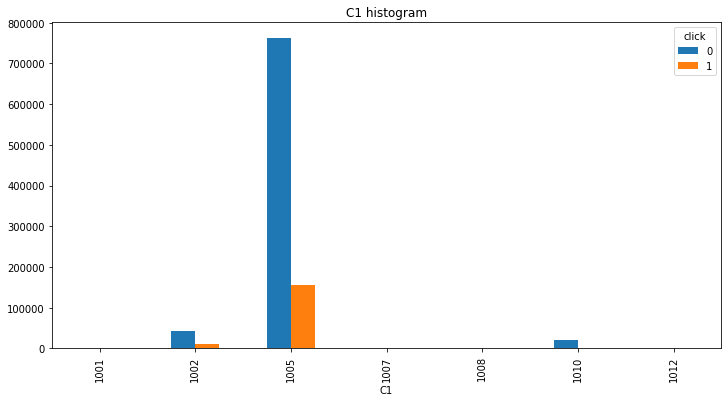

In [21]:
train.groupby(['C1', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='C1 histogram');

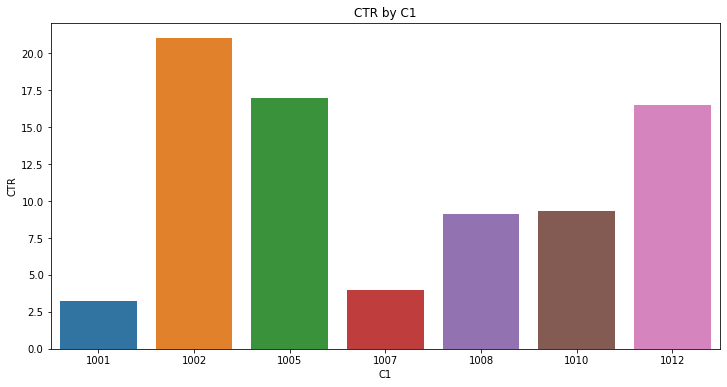

In [22]:
df_c1 = train[['C1','click']].groupby(['C1']).count().reset_index()
df_c1 = df_c1.rename(columns={'click': 'impressions'})
df_c1['clicks'] = df_click[['C1','click']].groupby(['C1']).count().reset_index()['click']
df_c1['CTR'] = df_c1['clicks']/df_c1['impressions']*100
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='C1', data=df_c1)
plt.title('CTR by C1');

In [23]:
print(train.banner_pos.value_counts()/len(train))

0    0.719927
1    0.278266
7    0.001088
2    0.000317
4    0.000207
5    0.000154
3    0.000041
Name: banner_pos, dtype: float64


In [24]:
banner_pos = train.banner_pos.unique()
banner_pos.sort()
ctr_avg_list=[]
for i in banner_pos:
    ctr_avg=train.loc[np.where((train.banner_pos == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for banner position: {},  click through rate: {}".format(i,ctr_avg))

for banner position: 0,  click through rate: 0.16484310214785666
for banner position: 1,  click through rate: 0.18332818238663726
for banner position: 2,  click through rate: 0.11041009463722397
for banner position: 3,  click through rate: 0.14634146341463414
for banner position: 4,  click through rate: 0.21256038647342995
for banner position: 5,  click through rate: 0.09090909090909091
for banner position: 7,  click through rate: 0.3180147058823529


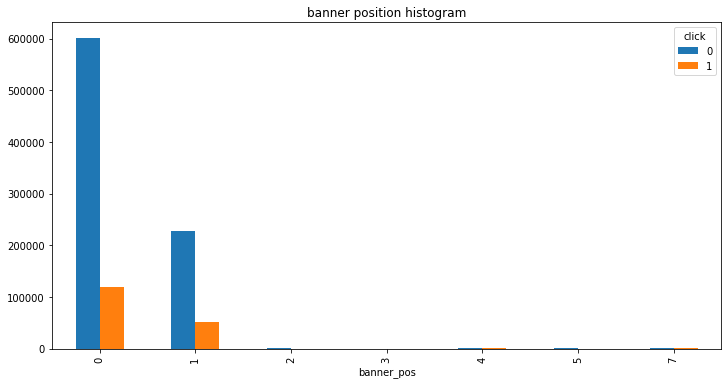

In [25]:
train.groupby(['banner_pos', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='banner position histogram');

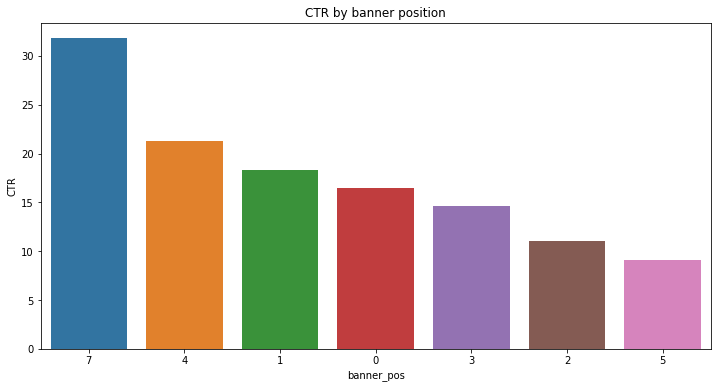

In [26]:
df_banner = train[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()
df_banner = df_banner.rename(columns={'click': 'impressions'})
df_banner['clicks'] = df_click[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()['click']
df_banner['CTR'] = df_banner['clicks']/df_banner['impressions']*100
sort_banners = df_banner.sort_values(by='CTR',ascending=False)['banner_pos'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='banner_pos', data=df_banner, order=sort_banners)
plt.title('CTR by banner position');

In [27]:
print('The impressions by device types')
print((train.device_type.value_counts()/len(train)))

The impressions by device types
1    0.922726
0    0.054783
4    0.019328
5    0.003162
2    0.000001
Name: device_type, dtype: float64


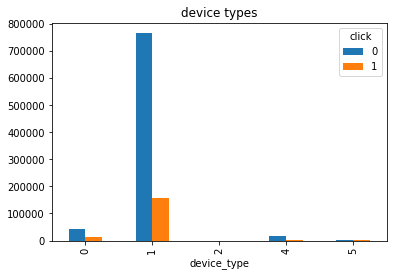

In [28]:
train[['device_type','click']].groupby(['device_type','click']).size().unstack().plot(kind='bar', title='device types');

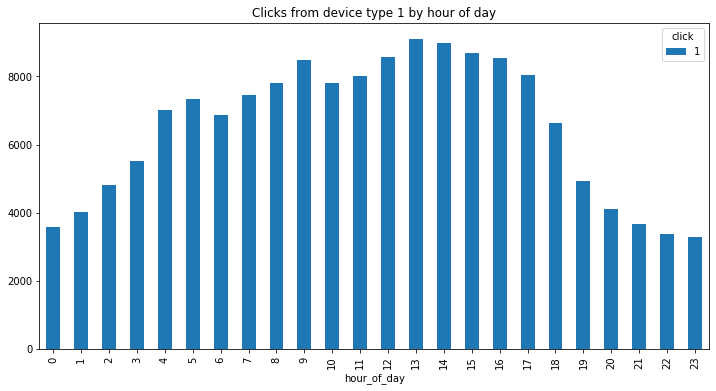

In [29]:
df_click[df_click['device_type']==1].groupby(['hour_of_day', 'click']).size().unstack().plot(kind='bar', title="Clicks from device type 1 by hour of day", figsize=(12,6));

In [30]:
device_type_click = df_click.groupby('device_type').agg({'click':'sum'}).reset_index()
device_type_impression = train.groupby('device_type').agg({'click':'count'}).reset_index().rename(columns={'click': 'impressions'})
merged_device_type = pd.merge(left = device_type_click , right = device_type_impression, how = 'inner', on = 'device_type')
merged_device_type['CTR'] = merged_device_type['click'] / merged_device_type['impressions']*100
merged_device_type

,device_type,click,impressions,CTR
0,0,11513,54783,21.015644
1,1,156523,922726,16.963107
2,4,1815,19328,9.390522
3,5,283,3162,8.950032


In [31]:
def convert_obj_to_int(self):
    
    object_list_columns = self.columns
    object_list_dtypes = self.dtypes
    new_col_suffix = '_int'
    for index in range(0,len(object_list_columns)):
        if object_list_dtypes[index] == object :
            self[object_list_columns[index]+new_col_suffix] = self[object_list_columns[index]].map( lambda  x: hash(x))
            self.drop([object_list_columns[index]],inplace=True,axis=1)
    return self
train = convert_obj_to_int(train)

In [51]:
import lightgbm as lgb

train1 = train.drop(columns="hour")
X_train = train1.loc[:, train1.columns != 'click']
y_target = train1.click.values
#create lightgbm dataset
msk = np.random.rand(len(X_train)) < 0.8
lgb_train = lgb.Dataset(X_train[msk], y_target[msk])
lgb_eval = lgb.Dataset(X_train[~msk], y_target[~msk], reference=lgb_train)
# specify your configurations as a dict
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': { 'binary_logloss'},
    'num_leaves': 31, # defauly leaves(31) amount for each tree
    'learning_rate': 0.08,
    'feature_fraction': 0.7, # will select 70% features before training each tree
    'bagging_fraction': 0.3, #feature_fraction, but this will random select part of data
    'bagging_freq': 5, #  perform bagging at every 5 iteration
    'verbose': 0
}

print('Start training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=4000,
                valid_sets=lgb_eval,
                early_stopping_rounds=500)

Start training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.045990 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid_0's binary_logloss: 0.451867
Training until validation scores don't improve for 500 rounds
[2]	valid_0's binary_logloss: 0.447756
[3]	valid_0's binary_logloss: 0.444176
[4]	valid_0's binary_logloss: 0.440911
[5]	valid_0's binary_logloss: 0.438196
[6]	valid_0's binary_logloss: 0.435765
[7]	valid_0's binary_logloss: 0.43343
[8]	valid_0's binary_logloss: 0.431476
[9]	valid_0's binary_logloss: 0.429924
[10]	valid_0's binary_logloss: 0.428487
[11]	valid_0's binary_logloss: 0.427146
[12]	valid_0's binary_logloss: 0.425983
[13]	valid_0's binary_logloss: 0.425014
[14]	valid_0's binary_logloss: 0.424002
[15]	valid_0's binary_logloss: 0.422874
[16]	valid_0's binary_logloss: 0.42179
[17]	valid_0's binary_logloss: 0.420933
[18]	valid_0's binary_

[197]	valid_0's binary_logloss: 0.405084
[198]	valid_0's binary_logloss: 0.405096
[199]	valid_0's binary_logloss: 0.405102
[200]	valid_0's binary_logloss: 0.405095
[201]	valid_0's binary_logloss: 0.405089
[202]	valid_0's binary_logloss: 0.405084
[203]	valid_0's binary_logloss: 0.405072
[204]	valid_0's binary_logloss: 0.405058
[205]	valid_0's binary_logloss: 0.405054
[206]	valid_0's binary_logloss: 0.405052
[207]	valid_0's binary_logloss: 0.405051
[208]	valid_0's binary_logloss: 0.405046
[209]	valid_0's binary_logloss: 0.405
[210]	valid_0's binary_logloss: 0.404994
[211]	valid_0's binary_logloss: 0.404951
[212]	valid_0's binary_logloss: 0.404945
[213]	valid_0's binary_logloss: 0.404933
[214]	valid_0's binary_logloss: 0.404897
[215]	valid_0's binary_logloss: 0.404892
[216]	valid_0's binary_logloss: 0.404864
[217]	valid_0's binary_logloss: 0.404869
[218]	valid_0's binary_logloss: 0.404863
[219]	valid_0's binary_logloss: 0.404858
[220]	valid_0's binary_logloss: 0.404855
[221]	valid_0's bin

[398]	valid_0's binary_logloss: 0.403596
[399]	valid_0's binary_logloss: 0.403577
[400]	valid_0's binary_logloss: 0.403565
[401]	valid_0's binary_logloss: 0.403569
[402]	valid_0's binary_logloss: 0.403569
[403]	valid_0's binary_logloss: 0.403571
[404]	valid_0's binary_logloss: 0.403578
[405]	valid_0's binary_logloss: 0.403567
[406]	valid_0's binary_logloss: 0.403559
[407]	valid_0's binary_logloss: 0.40355
[408]	valid_0's binary_logloss: 0.403539
[409]	valid_0's binary_logloss: 0.403495
[410]	valid_0's binary_logloss: 0.403495
[411]	valid_0's binary_logloss: 0.403474
[412]	valid_0's binary_logloss: 0.403466
[413]	valid_0's binary_logloss: 0.403444
[414]	valid_0's binary_logloss: 0.403442
[415]	valid_0's binary_logloss: 0.403423
[416]	valid_0's binary_logloss: 0.403411
[417]	valid_0's binary_logloss: 0.4034
[418]	valid_0's binary_logloss: 0.403405
[419]	valid_0's binary_logloss: 0.403393
[420]	valid_0's binary_logloss: 0.403385
[421]	valid_0's binary_logloss: 0.403367
[422]	valid_0's bin

[598]	valid_0's binary_logloss: 0.403095
[599]	valid_0's binary_logloss: 0.403103
[600]	valid_0's binary_logloss: 0.403105
[601]	valid_0's binary_logloss: 0.403103
[602]	valid_0's binary_logloss: 0.403102
[603]	valid_0's binary_logloss: 0.4031
[604]	valid_0's binary_logloss: 0.403101
[605]	valid_0's binary_logloss: 0.403105
[606]	valid_0's binary_logloss: 0.403103
[607]	valid_0's binary_logloss: 0.403108
[608]	valid_0's binary_logloss: 0.403093
[609]	valid_0's binary_logloss: 0.403094
[610]	valid_0's binary_logloss: 0.403095
[611]	valid_0's binary_logloss: 0.403081
[612]	valid_0's binary_logloss: 0.403087
[613]	valid_0's binary_logloss: 0.403086
[614]	valid_0's binary_logloss: 0.403098
[615]	valid_0's binary_logloss: 0.403098
[616]	valid_0's binary_logloss: 0.403099
[617]	valid_0's binary_logloss: 0.4031
[618]	valid_0's binary_logloss: 0.403095
[619]	valid_0's binary_logloss: 0.403094
[620]	valid_0's binary_logloss: 0.403086
[621]	valid_0's binary_logloss: 0.40308
[622]	valid_0's binar

[801]	valid_0's binary_logloss: 0.403041
[802]	valid_0's binary_logloss: 0.403036
[803]	valid_0's binary_logloss: 0.403038
[804]	valid_0's binary_logloss: 0.403033
[805]	valid_0's binary_logloss: 0.403035
[806]	valid_0's binary_logloss: 0.403032
[807]	valid_0's binary_logloss: 0.403038
[808]	valid_0's binary_logloss: 0.403049
[809]	valid_0's binary_logloss: 0.40303
[810]	valid_0's binary_logloss: 0.403019
[811]	valid_0's binary_logloss: 0.403025
[812]	valid_0's binary_logloss: 0.403031
[813]	valid_0's binary_logloss: 0.403034
[814]	valid_0's binary_logloss: 0.40304
[815]	valid_0's binary_logloss: 0.40305
[816]	valid_0's binary_logloss: 0.403056
[817]	valid_0's binary_logloss: 0.403047
[818]	valid_0's binary_logloss: 0.403032
[819]	valid_0's binary_logloss: 0.403019
[820]	valid_0's binary_logloss: 0.403016
[821]	valid_0's binary_logloss: 0.402997
[822]	valid_0's binary_logloss: 0.402992
[823]	valid_0's binary_logloss: 0.402994
[824]	valid_0's binary_logloss: 0.402988
[825]	valid_0's bin

[1002]	valid_0's binary_logloss: 0.403109
[1003]	valid_0's binary_logloss: 0.40312
[1004]	valid_0's binary_logloss: 0.403127
[1005]	valid_0's binary_logloss: 0.40312
[1006]	valid_0's binary_logloss: 0.403124
[1007]	valid_0's binary_logloss: 0.403123
[1008]	valid_0's binary_logloss: 0.403119
[1009]	valid_0's binary_logloss: 0.403115
[1010]	valid_0's binary_logloss: 0.403113
[1011]	valid_0's binary_logloss: 0.403116
[1012]	valid_0's binary_logloss: 0.403111
[1013]	valid_0's binary_logloss: 0.403111
[1014]	valid_0's binary_logloss: 0.40311
[1015]	valid_0's binary_logloss: 0.403108
[1016]	valid_0's binary_logloss: 0.40311
[1017]	valid_0's binary_logloss: 0.403111
[1018]	valid_0's binary_logloss: 0.403118
[1019]	valid_0's binary_logloss: 0.403117
[1020]	valid_0's binary_logloss: 0.403119
[1021]	valid_0's binary_logloss: 0.40312
[1022]	valid_0's binary_logloss: 0.403122
[1023]	valid_0's binary_logloss: 0.403134
[1024]	valid_0's binary_logloss: 0.403136
[1025]	valid_0's binary_logloss: 0.4031

[1198]	valid_0's binary_logloss: 0.403194
[1199]	valid_0's binary_logloss: 0.403197
[1200]	valid_0's binary_logloss: 0.403195
[1201]	valid_0's binary_logloss: 0.403187
[1202]	valid_0's binary_logloss: 0.403182
[1203]	valid_0's binary_logloss: 0.403177
[1204]	valid_0's binary_logloss: 0.403171
[1205]	valid_0's binary_logloss: 0.403172
[1206]	valid_0's binary_logloss: 0.403177
[1207]	valid_0's binary_logloss: 0.403179
[1208]	valid_0's binary_logloss: 0.40318
[1209]	valid_0's binary_logloss: 0.40319
[1210]	valid_0's binary_logloss: 0.403193
[1211]	valid_0's binary_logloss: 0.403197
[1212]	valid_0's binary_logloss: 0.403185
[1213]	valid_0's binary_logloss: 0.40318
[1214]	valid_0's binary_logloss: 0.403184
[1215]	valid_0's binary_logloss: 0.403182
[1216]	valid_0's binary_logloss: 0.403186
[1217]	valid_0's binary_logloss: 0.403186
[1218]	valid_0's binary_logloss: 0.403183
[1219]	valid_0's binary_logloss: 0.403187
[1220]	valid_0's binary_logloss: 0.403182
[1221]	valid_0's binary_logloss: 0.40

In [36]:
from operator import itemgetter
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import roc_auc_score

def run_default_test(train, test, features, target, random_state=0):
    eta = 0.1
    max_depth = 5
    subsample = 0.8
    colsample_bytree = 0.8
    print('XGBoost params. ETA: {}, MAX_DEPTH: {}, SUBSAMPLE: {}, COLSAMPLE_BY_TREE: {}'.format(eta, max_depth, subsample, colsample_bytree))
    params = {
        "objective": "binary:logistic",
        "booster" : "gbtree",
        "eval_metric": "logloss",
        "eta": eta,
        "max_depth": max_depth,
        "subsample": subsample,
        "colsample_bytree": colsample_bytree,
        "silent": 1,
        "seed": random_state
    }
    num_boost_round = 260
    early_stopping_rounds = 20
    test_size = 0.2

    X_train, X_valid = train_test_split(train, test_size=test_size, random_state=random_state)
    y_train = X_train[target]
    y_valid = X_valid[target]
    dtrain = xgb.DMatrix(X_train[features], y_train)
    dvalid = xgb.DMatrix(X_valid[features], y_valid)
    watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
    gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, early_stopping_rounds=early_stopping_rounds, verbose_eval=True)
    
features = ['C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'hour_of_day',
       'site_id_int', 'site_domain_int', 'site_category_int', 'app_id_int',
       'app_domain_int', 'app_category_int', 'device_id_int', 'device_ip_int',
       'device_model_int', 'day_of_week_int']
run_default_test(train, y_target, features, 'click')

XGBoost params. ETA: 0.1, MAX_DEPTH: 5, SUBSAMPLE: 0.8, COLSAMPLE_BY_TREE: 0.8
[14:33:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-logloss:0.64865	eval-logloss:0.64921
[1]	train-logloss:0.61337	eval-logloss:0.61294
[2]	train-logloss:0.58321	eval-logloss:0.58317
[3]	train-logloss:0.55828	eval-logloss:0.55837
[4]	train-logloss:0.53775	eval-logloss:0.53746
[5]	train-logloss:0.52022	eval-logloss:0.52013
[6]	train-logloss:0.50534	eval-logloss:0.50511
[7]	train-logloss:0.49265	eval-logloss:0.49244
[8]	train-logloss:0.48196	eval-logloss:0.48190
[9]	train-logloss:0.47311	eval-logloss:0.47291
[10]	train-logloss:0.46523	eval-logl

[160]	train-logloss:0.40374	eval-logloss:0.40566
[161]	train-logloss:0.40365	eval-logloss:0.40558
[162]	train-logloss:0.40360	eval-logloss:0.40555
[163]	train-logloss:0.40357	eval-logloss:0.40553
[164]	train-logloss:0.40355	eval-logloss:0.40551
[165]	train-logloss:0.40351	eval-logloss:0.40548
[166]	train-logloss:0.40344	eval-logloss:0.40543
[167]	train-logloss:0.40340	eval-logloss:0.40542
[168]	train-logloss:0.40338	eval-logloss:0.40540
[169]	train-logloss:0.40329	eval-logloss:0.40531
[170]	train-logloss:0.40325	eval-logloss:0.40529
[171]	train-logloss:0.40318	eval-logloss:0.40522
[172]	train-logloss:0.40315	eval-logloss:0.40520
[173]	train-logloss:0.40312	eval-logloss:0.40517
[174]	train-logloss:0.40310	eval-logloss:0.40517
[175]	train-logloss:0.40308	eval-logloss:0.40516
[176]	train-logloss:0.40303	eval-logloss:0.40512
[177]	train-logloss:0.40296	eval-logloss:0.40506
[178]	train-logloss:0.40293	eval-logloss:0.40505
[179]	train-logloss:0.40288	eval-logloss:0.40502
[180]	train-logloss: